# Business understanding

Employers want to understand what leads to employee sttrition as that can be costly and disruptive. 

TODO: finish business understanding

# Data Understanding

In [60]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option("display.max_columns", None)

In [61]:
hr_df = pd.read_csv(os.path.join('data', 'Human_resources.csv'))
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [62]:
hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


We can drop columns `EmployeeCount`, `StandardHours`, and `Over18` as they are the same for each entry (i.e. they contain no useful data). We can also likely drop `EmployeeNumber` as it is just nominal data.

In [63]:
hr_df = hr_df.drop(columns=['EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18'])
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


# Data Preparation

<AxesSubplot:>

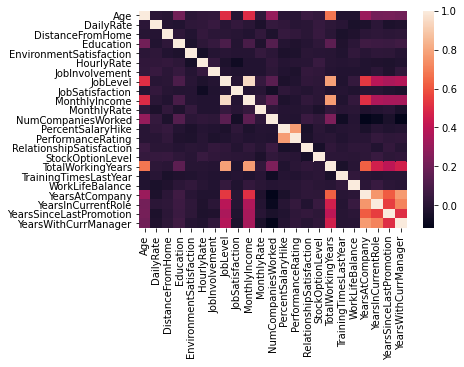

In [64]:
corr_df = hr_df.corr()
sns.heatmap(corr_df, 
            xticklabels=corr_df.columns,
            yticklabels=corr_df.columns)

We can see that monthly income is strongly correlated to job level (r=0.9503) so we can drop one to reduce multicolinearity. We will drop job level as monthly income provides greater nuance.

In [65]:
hr_df = hr_df.drop(columns=['JobLevel'])
hr_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


Perform one hot encoding of categorial data

In [66]:
travel_dummies = pd.get_dummies(hr_df['BusinessTravel']).rename(columns={'Non-Travel': 'does_no_travel', 'Travel_Frequently': 'does_travel_frequently', 'Travel_Rarely': 'does_travel_rarely'})
department_dummies = pd.get_dummies(hr_df['Department']).rename(columns={'Human Resources': 'works_in_hr', 'Research & Development': 'works_in_rnd', 'Sales': 'works_in_sales'})
education_dummies = pd.get_dummies(hr_df['Education']).rename(columns={1: 'is_below_college', 2: 'is_college', 3: 'is_bachelor', 4: 'is_master', 5: 'is_doctor'})
education_field_dummies = pd.get_dummies(hr_df['EducationField']).rename(columns={'Human Resources': 'is_edu_hr', 'Life Sciences': 'is_edu_life_sciences', 'Marketing': 'is_edu_marketing', 'Medical': 'is_edu_medical', 'Other': 'is_edu_other', 'Technical Degree': 'is_edu_tech_degree'})
environ_satisfaction_dummies = pd.get_dummies(hr_df['EnvironmentSatisfaction']).rename(columns={1: 'is_environ_satify_low', 2: 'is_environ_satify_medium', 3: 'is_environ_satify_high', 4: 'is_environ_satify_very_high'})
gender_dummies = pd.get_dummies(hr_df['Gender']).rename(columns={'Female': 'is_female', 'Male': 'is_male'})
job_involve_dummies = pd.get_dummies(hr_df['JobInvolvement']).rename(columns={1: 'is_job_involve_low', 2: 'is_job_involve_medium', 3: 'is_job_involve_high', 4: 'is_job_involve_very_high'})
job_role_dummies = pd.get_dummies(hr_df['JobRole']).rename(columns={'Healthcare Representative': 'is_job_healthcare_rep', 'Human Resources': 'is_job_hr', 'Laboratory Technician': 'is_job_lab_tech', 'Manager': 'is_job_manager', 'Manufacturing Director': 'is_job_manu_director', 'Research Director': 'is_job_research_director', 'Research Scientist': 'is_job_research_scientist', 'Sales Executive': 'is_job_sales_exec', 'Sales Representative': 'is_job_sales_rep'})
job_satify_dummies = pd.get_dummies(hr_df['JobSatisfaction']).rename(columns={1: 'is_job_satisfy_low', 2: 'is_job_satisfy_medium', 3: 'is_job_satisfy_high', 4: 'is_job_satisfy_very_high'})
marital_dummies = pd.get_dummies(hr_df['MaritalStatus']).rename(columns={'Divorced': 'is_divorced', 'Married': 'is_married', 'Single': 'is_single'})
overtime_dummies = pd.get_dummies(hr_df['OverTime']).rename(columns={'Yes': 'has_overtime', 'No': 'has_no_overtime'})
performance_dummies = pd.get_dummies(hr_df['PerformanceRating']).rename(columns={1: 'performance_low', 2: 'performance_good', 3: 'performance_excellent', 4: 'performance_outstanding'})
relationship_satisfy_dummies = pd.get_dummies(hr_df['RelationshipSatisfaction']).rename(columns={1: 'is_relationship_satisy_low', 2: 'is_relationship_satisy_medium', 3: 'is_relationship_satisy_high', 4: 'is_relationship_satisy_very_high'})
stock_option_dummies = pd.get_dummies(hr_df['StockOptionLevel']).rename(columns={0: 'stock_option_none', 1: 'stock_option_low', 2: 'stock_option_medium', 3: 'stock_option_high'})
work_balance_dummies = pd.get_dummies(hr_df['WorkLifeBalance']).rename(columns={1: 'work_balance_low', 2: 'work_balance_medium', 3: 'work_balance_high', 4: 'work_balance_very_high'})

hr_df = pd.concat([hr_df[['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 
                            'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
                            'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']],
                     travel_dummies, department_dummies, education_dummies, education_field_dummies, environ_satisfaction_dummies, 
                     gender_dummies, job_involve_dummies, job_role_dummies, job_satify_dummies, marital_dummies, overtime_dummies,
                     performance_dummies, relationship_satisfy_dummies, stock_option_dummies, work_balance_dummies], axis=1)
hr_df = hr_df.drop(columns=['does_no_travel', 'works_in_hr', 'is_below_college', 'is_edu_hr', 'is_environ_satify_low', 
                           'is_female', 'is_job_involve_low', 'is_job_healthcare_rep', 'is_job_satisfy_low', 
                           'is_divorced', 'has_overtime', 'performance_excellent', 'is_relationship_satisy_low', 'stock_option_none', 
                           'work_balance_low'])
hr_df.head()

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,does_travel_frequently,does_travel_rarely,works_in_rnd,works_in_sales,is_college,is_bachelor,is_master,is_doctor,is_edu_life_sciences,is_edu_marketing,is_edu_medical,is_edu_other,is_edu_tech_degree,is_environ_satify_medium,is_environ_satify_high,is_environ_satify_very_high,is_male,is_job_involve_medium,is_job_involve_high,is_job_involve_very_high,is_job_hr,is_job_lab_tech,is_job_manager,is_job_manu_director,is_job_research_director,is_job_research_scientist,is_job_sales_exec,is_job_sales_rep,is_job_satisfy_medium,is_job_satisfy_high,is_job_satisfy_very_high,is_married,is_single,has_no_overtime,performance_outstanding,is_relationship_satisy_medium,is_relationship_satisy_high,is_relationship_satisy_very_high,stock_option_low,stock_option_medium,stock_option_high,work_balance_medium,work_balance_high,work_balance_very_high
0,41,Yes,1102,1,94,5993,19479,8,11,8,0,6,4,0,5,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,49,No,279,8,61,5130,24907,1,23,10,3,10,7,1,7,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0
2,37,Yes,1373,2,92,2090,2396,6,15,7,3,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,33,No,1392,3,56,2909,23159,1,11,8,3,8,7,3,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,27,No,591,2,40,3468,16632,9,12,6,3,2,2,2,2,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0


Since our data is a mix of categorical and continuous we cannot use PCA (squared deviations do not make sense of binary variables). Instead we will use Factor analysis of mixed data (FAMD).